# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1. To clean the price variable, I first reviewed the different possible values within the column. I noticed that for prices over 999, an extra comma was added for formatting purposes. I addressed this by creating a new column, "Cleaned_price", and filtered out all comma characters for all values. Next, I converted each value back into a numeric type in order to prevent any type mismatches. Any values that could not be converted would be replaced with NaN, or missing. Finally, I summed the NaN values within Cleaned_price and got 0 missing values.

In [121]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

df_airbnb = pd.read_csv("./data/airbnb_hw.csv")

# There exist price values with "," characters when over 999, also of type string
df_airbnb["Price"].unique()

# Create a new column "Cleaned_price" and remove commas
df_airbnb["Cleaned_price"] = df_airbnb["Price"].str.replace(",", "")

# Convert Cleaned_price to numeric type, replace any faulty values with NaN
df_airbnb['Cleaned_price'] = pd.to_numeric(df_airbnb['Cleaned_price'], errors='coerce')

# Get count of missing values within Cleaned_price
df_airbnb["Cleaned_price"].isna().sum()

0

2. The NaN values for the subject_injury variable were handled by replacing any empty string values with np.nan. Because there were only 3 unique values in the dataset, "Yes", "No", and NaN, no attempts to clean the casing or spelling of the results were necessary. It was interesting that a majority of observations lacked values, approximately 76%. This is a concerningly high proportion, which forms a clearer pattern when the "subject_injury_nan" variable is cross-tabulated with "force_type." From it, we can see spikes in missing values for force types such as "Bodily Force", "Chemical Irritant", and "Taser", where the number of missing values greatly outnumbers the sum of "Yes" and "No" responses, indicating an unusual amount of unreported injuries in these specific categories.

In [133]:
df_police = pd.read_csv("./data/mn_police_use_of_force.csv")

# Unique values are "Yes", "No", and "NaN"
print(df_police["subject_injury"].unique(), "\n")

# Handle NaNs by converting any missing values to it
df_police["Cleaned_subject_injury"] = (
    df_police["subject_injury"]
    .replace(" ", np.nan)
)

df_police["subject_injury_nan"] = df_police["subject_injury"].isnull()

# Number of NaN rows / total rows
print(f"Proportion of missing values: ", sum(df_police["subject_injury_nan"]) / len(df_police), "\n")

# Number of missing values per force type
print(pd.crosstab(df_police["subject_injury_nan"], df_police["force_type"]), "\n")

# Do not drop NaN rows in order to observe when more missing values occur
pd.crosstab(df_police["Cleaned_subject_injury"], df_police["force_type"], dropna=False)

[nan 'No' 'Yes'] 

Proportion of missing values:  0.7619342359767892 

force_type          Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_nan                                                    
False                   2          2379                172        2   
True                    2          7051               1421        0   

force_type          Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_nan                                                      
False                              77                 74            0   
True                               27                 74           87   

force_type          Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_nan                                                        
False                                    3                            0   
True                                     0                          170   

force_type          Police K9 Bite  Taser  
subjec

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
Cleaned_subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


3. This variable was cleaned by first checking for its unique values: 0, 1, and 9. While 0 and 1 are interpreted as yes/no or true/false, 9 is not a binary value and can therefore be considered a missing value. Thus, we create a new cleaned variable and replace 9 with np.nan. Because the values are also already numeric, no additional cleaning is needed.

In [134]:
import numpy as np

df_pretrial = pd.read_parquet("./data/justice_data.parquet")

# Unique values of 0, 1, and 9 (which should not be in answer)
print(df_pretrial["WhetherDefendantWasReleasedPretrial"].unique(), "\n")

# Values are already numeric, so replace 9 with np.nan
df_pretrial["CleanedWhetherDefendantWasReleasedPretrial"] = (
    df_pretrial["WhetherDefendantWasReleasedPretrial"]
    .replace(9, np.nan)
)

# Values are now "Yes", "No", and NaN
df_pretrial["CleanedWhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)

[9 0 1] 



CleanedWhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64

4. I cleaned this variable by replacing empty values with NaN, converting the values from strings to integers, and rounding any floating point values to the nearest whole number. Empty strings provide no context to our value, so we can standardize this lack of information using NaN. Next, to follow the formatting rule in the SentenceTypeAllChargesAtConvictionInContactEvent variable, I converted the string numbers to integers. This also makes it easier for later analysis/computation. Lastly, I rounded sentences to the nearest whole number to remove the messy remainders. In the context of the dataset, it is also more reasonable to have whole number sentences rather than portions of some time period to serve.

In [135]:
df_pretrial = pd.read_parquet("./data/justice_data.parquet")

# No empty strings, numeric type not strings
print(df_pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"].unique(), "\n")

df_pretrial["CleanedImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(
    df_pretrial["ImposedSentenceAllChargeInContactEvent"], errors="coerce"
)

df_pretrial["CleanedImposedSentenceAllChargeInContactEvent"] = df_pretrial[
    "CleanedImposedSentenceAllChargeInContactEvent"
].round(0).astype("Int64")

df_pretrial["CleanedImposedSentenceAllChargeInContactEvent"].value_counts(dropna=False)


[9 0 1 4 2] 



CleanedImposedSentenceAllChargeInContactEvent
<NA>    9053
0       5702
12      1720
1       1130
3        905
        ... 
176        1
124        1
551        1
405        1
230        1
Name: count, Length: 234, dtype: Int64

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [136]:
# 1. Open file
df_shark = pd.read_excel("./data/GSAF5.xls")

# 2. Drop columns that are completely empty (every value for a variable is NaN)
df_shark = df_shark.dropna(axis=1, how="all")

3. The year variable has a wide range of values, spanning from NaN and 0 to 2026. These, of course, are not valid values and are later filtered out. I cleaned the variable by converting all the values to be numeric for consistency, but also to replace any missing values with NaN. Next, I converted each value to an integer to remove the "." character following each value. I filtered for rows between 1940 and 2025, as anything past this year is invalid. When viewing the output of .value_counts(), shark attacks have had mild increases and decreases within the 20th Century, but have steeply ramped up past 2000, peaking at 143 in 2015.

In [137]:
print(df_shark["Year"].unique(), "\n")

# Replace values that cannot be converted to numeric to NaN
df_shark["Cleaned_Year"] = pd.to_numeric(df_shark["Year"], errors="coerce")

# Convert to integer
df_shark["Cleaned_Year"] = df_shark["Cleaned_Year"].astype("Int64")

filter = ((df_shark["Cleaned_Year"] >= 1940) & (df_shark["Cleaned_Year"] <= 2025))
df_shark_recent = df_shark[filter]

# Only contains attacks since 1940
df_shark_recent["Cleaned_Year"].unique()

# Sort output by index/year
# .to_string to get full output
print(df_shark_recent["Cleaned_Year"].value_counts().sort_index().to_string())

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

4. This variable was cleaned by converting values to numeric, setting any non-numeric values to be NaN. Next, all values were converted to integers to remove the floating point because our age is measured in years. The histogram illustrates that the age group with the highest frequency of attacks is teenagers and those in their 20s, which slowly tapers off with an increase in age.

<IntegerArray>
[<NA>,   63,    9,   39,   19,    7,   85,   69,   18,   66,   21,   40,   37,
   16,   20,   12,   42,   26,   14,   45,   30,   56,   29,   35,   58,   24,
   55,   17,   36,   23,   28,   48,   57,   61,   27,   38,   68,   33,   15,
   41,   43,   49,   25,   46,   65,   64,   13,   11,   32,   10,   62,   22,
   52,   44,   47,   59,    8,   50,   34,   77,   60,   73,   67,    6,   53,
   51,   31,   71,   54,   75,   70,    4,   74,    3,   82,   72,    5,   86,
   84,   87,    1,   81,   78]
Length: 83, dtype: Int64 



Text(0, 0.5, 'Number of Attacks')

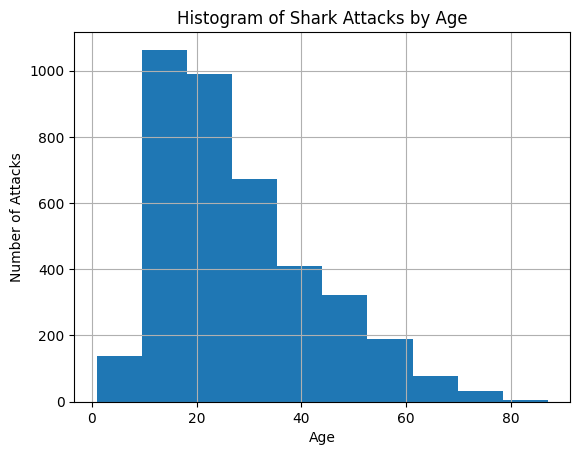

In [138]:
# Mixed text and characters with integers
df_shark["Age"].unique()

df_shark["Cleaned_Age"] = pd.to_numeric(df_shark["Age"], errors="coerce")
df_shark["Cleaned_Age"] = df_shark["Cleaned_Age"].astype("Int64")

# Now values are all integers or NaN
print(df_shark["Cleaned_Age"].unique(), "\n")

df_shark["Cleaned_Age"].hist(bins = 10)
plt.title("Histogram of Shark Attacks by Age")
plt.xlabel("Age")
plt.ylabel("Number of Attacks")

5. Looking at the unique values of the "Sex" variable, there are entries with extra spaces, capitalization issues, and other characters besides "M" or "F." To clean this, we first uppercase everything for standardization, then strip the extra spaces into a new dummy variable, "Cleaned_Sex." Next, we locate all values that are not "M" or "F" and replace them with np.nan. Once our variable is cleaned, we divide the number of male victims over the total number of victims, ignoring NaN values. This gives us a proportion of 0.875, or 87.5%.

In [128]:
# Spacing errors and values besides "M" or "F"
print(df_shark["Sex"].unique(), "\n")

# Uppercase for standardization, then strip trailing spaces
df_shark["Cleaned_Sex"] = (
    df_shark["Sex"]
    .str.upper()
    .str.strip()
)

# Locate all values in "Cleaned_Sex" that are not "M" or "F" and replace them with np.nan
df_shark.loc[~df_shark["Cleaned_Sex"].isin(["M", "F"]), "Cleaned_Sex"] = np.nan

# Now values are only "M", "F", or "NaN"
print(df_shark["Cleaned_Sex"].unique(), "\n")

# Number of male victims / number of all victims (ignoring NaN)
print("Proportion of male victims: ", 
    sum(df_shark["Cleaned_Sex"] == "M") / sum(df_shark["Cleaned_Sex"].notna()))

['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2' 'N' '.'] 

['M' 'F' nan] 

Proportion of male victims:  0.8751935583772066


6. A similar process is used to clean the "Type" variable. The values are uppercased and stripped, then all other values besides "PROVOKED" and "UNPROVOKED" are replaced with "UNKNOWN." Dividing the count of unprovoked attacks by the number of total attacks generates a proportion of 0.738, or 73.8%.

In [129]:
# Spacing and capitalization inconsistencies
print(df_shark["Type"].unique(), "\n")

df_shark["Cleaned_Type"] = (
    df_shark["Type"]
    .str.upper()
    .str.strip()
)

# Replace all other values with "UNKNOWN"
df_shark.loc[~df_shark["Cleaned_Type"].isin(["PROVOKED", "UNPROVOKED"]), "Cleaned_Type"] = "UNKNOWN"

print(df_shark["Cleaned_Type"].value_counts(), "\n")

# Number of unprovoked attacks / number of all attacks
print("Proportion of unprovoked attacks: ",
    sum(df_shark["Cleaned_Type"] == "UNPROVOKED") / len(df_shark["Cleaned_Type"]))

['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 

Cleaned_Type
UNPROVOKED    5197
UNKNOWN       1204
PROVOKED       641
Name: count, dtype: int64 

Proportion of unprovoked attacks:  0.7380005680204488


In [130]:
# 7. Clean the "Fatal Y/N" variable to only accept "Y", "N", and "Unknown"

print(df_shark["Fatal Y/N"].unique(), "\n")

df_shark["Cleaned_Fatal_Y/N"] = (
    df_shark["Fatal Y/N"]
    .str.upper()
    .str.strip()
)

# Replace anything that is not "Y" or "N" with "Unknown"
df_shark.loc[~df_shark["Cleaned_Fatal_Y/N"].isin(["Y", "N"]), "Cleaned_Fatal_Y/N"] = "Unknown"

# Only has Y, N, or Unknown
df_shark["Cleaned_Fatal_Y/N"].value_counts()


['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y'] 



Cleaned_Fatal_Y/N
N          4917
Y          1482
Unknown     643
Name: count, dtype: int64

8. By cross-tabulating the "Cleaned_Sex" and "Cleaned_Type" categories and normalizing them, we can see which combinations of groups were more likely to be attacked. For unprovoked attacks, sharks are more likely to attack women slightly more than men. Cross-tabulating "Cleaned_Type" and "Cleaned_Fatal_Y/N" reveals that attacks are more likely to be fatal when they are unprovoked (0.243) compared to provoked (0.033). Finally, cross-tabulating "Cleaned_Fatal_Y/N" and "Cleaned_Sex" shows that attacks are more likely to be fatal for males (0.221) than females (0.151). Despite these numbers, I still find sharks fascinaing to observe from a distance. I was surprised that unprovoked attacks were more likely to be fatal, assuming that provoked attacks meant the shark would retaliate.

In [131]:
print(pd.crosstab(df_shark["Cleaned_Sex"], df_shark["Cleaned_Type"], normalize="index"), "\n")

print(pd.crosstab(df_shark["Cleaned_Type"], df_shark["Cleaned_Fatal_Y/N"], normalize="index"), "\n")

print(pd.crosstab(df_shark["Cleaned_Sex"], df_shark["Cleaned_Fatal_Y/N"], normalize="index"), "\n")

Cleaned_Type  PROVOKED   UNKNOWN  UNPROVOKED
Cleaned_Sex                                 
F             0.038462  0.114144    0.847395
M             0.097311  0.133935    0.768754 

Cleaned_Fatal_Y/N         N   Unknown         Y
Cleaned_Type                                   
PROVOKED           0.953198  0.014041  0.032761
UNKNOWN            0.372924  0.460963  0.166113
UNPROVOKED         0.742159  0.015201  0.242640 

Cleaned_Fatal_Y/N         N   Unknown         Y
Cleaned_Sex                                    
F                  0.761787  0.086849  0.151365
M                  0.697275  0.081387  0.221338 



9. 0.107 or 10.7% of attacks appear to be from white sharks. This was calculated by uppercasing and stripping each value in "Species " into a new column "Cleaned_Species." Next, a new dummy column, "White_Shark", was created to store whether a species was a white shark or not. This was computed by checking if each string value contained "WHITE" or not. NaN values were also considered false. To get the proportion, I divided the number of true values in "White_Shark" by the total number of values.

In [132]:
df_shark["Species "].unique()

df_shark["Cleaned_Species"] = (
    df_shark["Species "]
    .str.upper()
    .str.strip()    
)

# Check for the keyword "WHITE" in each value, mark as True if it contains it, false otherwise
df_shark["White_Shark"] = df_shark["Cleaned_Species"].str.contains("WHITE", na=False)

print(df_shark["White_Shark"].value_counts(), "\n")

print("Proportion of white shark attacks: ", sum(df_shark["White_Shark"]) / len(df_shark["White_Shark"]))

White_Shark
False    6290
True      752
Name: count, dtype: int64 

Proportion of white shark attacks:  0.10678784436239705
